# Смеси распределений

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9)

In [2]:
def Gauss(x , mean , sd):
    prob_density = 1./sd/(2*np.pi)**0.5*np.exp(-(x-mean)**2/(2.*sd**2))
    return prob_density

In [3]:
class generator(st.rv_continuous):
    def _pdf(self, x):
        return 0.5 * Gauss(x, -2.0, 2.0) + 0.5 * Gauss(x, 3.0, 1.0)

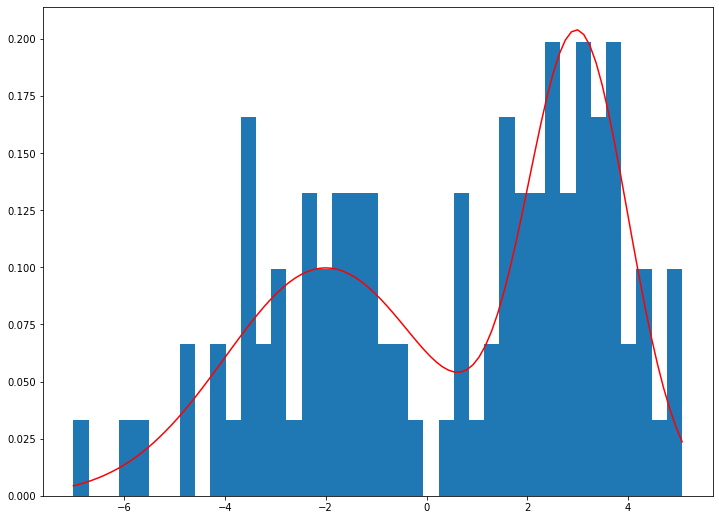

In [4]:
Contin = generator(name='Contin')

n = 100

Z = Contin.rvs(size=n, random_state=35)
plt.hist(Z, bins=40, density = 1.0);

grid = np.linspace(np.min(Z), np.max(Z), n)
plt.plot(grid, Contin.pdf(grid), 'r');

In [5]:
tau1 = np.zeros((n))
tau2 = np.zeros((n))

In [6]:
mu1 = 0.4
mu2 = 0.6

In [7]:
sigma1 = 2. / (2. ** 0.5)
sigma2 = 1. / (2. ** 0.5)

In [8]:
w1 = 0.1
w2 = 0.1

In [9]:
for it in range(0, 1000):
    
    wit = w1
    
    for i in range(0, n):
        summa = w1 * Gauss(Z[i], mu1, sigma1) + w2 * Gauss(Z[i], mu2, sigma2)
        tau1[i] = w1 * Gauss(Z[i], mu1, sigma1) / summa
        tau2[i] = w2 * Gauss(Z[i], mu2, sigma2) / summa
    
    w1 = np.sum(tau1) / n
    mu1 = np.sum(tau1 * Z) / np.sum(tau1)
    sigma1 = (np.sum(tau1 * (Z - mu1) ** 2) / np.sum(tau1)) ** 0.5
    
    w2 = np.sum(tau2) / n
    mu2 = np.sum(tau2 * Z) / np.sum(tau2)
    sigma2 = (np.sum(tau2 * (Z - mu2) ** 2) / np.sum(tau2)) ** 0.5
    
    eps = abs(w1 - wit)
    
    if(eps <= 1.e-4):
        break
    
    
print('Количество итераций: ', it)

number of itterations 46
0.4808986528664155 0.5191013471335846
-2.192042220301998 2.8859668882124145
1.847119710864911 1.093126246947245


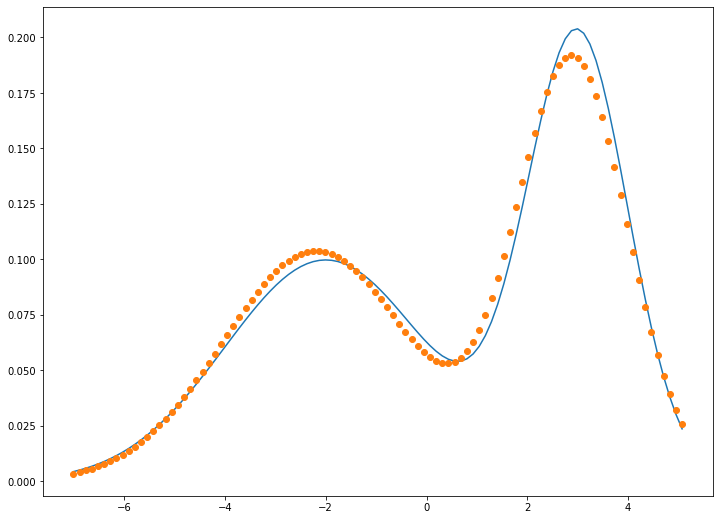

In [10]:
plt.plot(grid, Contin.pdf(grid))
x = np.linspace(np.min(Z), np.max(Z), n)
pdfArray = w1 * Gauss(x, mu1, sigma1) + w2 * Gauss(x, mu2, sigma2)
plt.plot(grid, pdfArray, 'o');

# Статистическая обработка

In [11]:
def trasform_features(features, degree):
    return features.reshape(-1, 1) ** (np.arange(degree))

In [12]:
class Regression:
    def __init__(self, degree=2):
        self.degree = degree
        
    def fit(self, X, y):
        Xp = trasform_features(X, self.degree)
        return np.linalg.solve(np.dot(Xp.T, Xp), np.dot(Xp.T, y))
        
    def predict(self, X, W):
        Xp = trasform_features(X, self.degree)
        return np.dot(Xp, W)

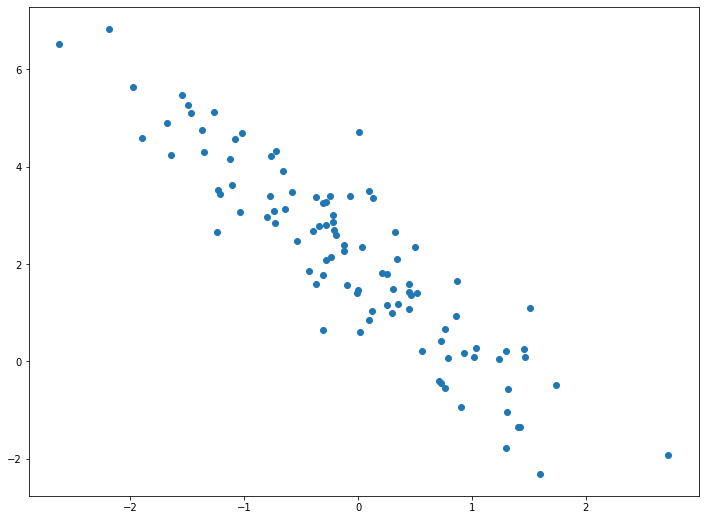

In [13]:
n = 100

x = np.random.randn(n)
y = - 1.8*x + 2 + 0.8 * np.random.randn(n)

plt.plot (x, y, 'o');

In [14]:
reg = Regression()
coeffs = reg.fit(x, y)
y_r = reg.predict(x, coeffs)

In [15]:
res_var = np.sum(((y_r - y) ** 2)) / (n - 2)

var_b0 = (res_var * np.sum(x ** 2)) / (n * np.sum((x - (x.mean()) * n) ** 2))
var_b1 = res_var / (np.sum((x - (x.mean()) * n) ** 2))

print ('дисперсия для b0 =', var_b0)
print ('дисперсия для b1 =', var_b1)

дисперсия для b0 = 0.0001919470370290881
дисперсия для b1 = 0.00019884136019399678


In [16]:
t_b0 = abs (coeffs[0] / np.sqrt(var_b0))
t_b1 = abs (coeffs[1] / np.sqrt(var_b1))

alpha = 0.05
t_st = st.t.ppf(1 - alpha, len(x) - 1)

print (t_b0, '>', t_st)
print (t_b1, '>', t_st)
print ('t-статистика больше => отклоняем гипотезу о незначимости коэффициентов')

146.66741749855836 > 1.6603911559963895
126.75638262427915 > 1.6603911559963895
t-статистика больше => отклоняем гипотезу о незначимости коэффициентов


In [17]:
t_st = st.t.ppf(1 - alpha, len(x) - 2)
minusb0 = coeffs[0] - (np.sqrt(var_b0) * t_st)
plusb0 = coeffs[0] + (np.sqrt(var_b0) * t_st)

minusb1 = coeffs[1] - (np.sqrt(var_b1) * t_st)
plusb1 = coeffs[1] + (np.sqrt(var_b1) * t_st)

print ('доверительные интервалы:')
print ('b0: (', minusb0, ', ', plusb0, ')')
print ('b1: (', minusb1, ', ', plusb1, ')')

доверительные интервалы:
b0: ( 2.00899693172483 ,  2.055009129430515 )
b1: ( -1.8108215693314127 ,  -1.7639903318792178 )
